In [6]:
import pandas as pd
import numpy as np
import lftk

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold



In [16]:
data_df = pd.read_csv(r"Datasets/Processed Data/data_features_extracted_df.csv")

In [17]:
X = data_df.drop(["text", "Polarity"], axis=1)
y = data_df["Polarity"]

In [18]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.15)

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

In [13]:
selected_features = ['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

## Initial Model Comparison

In [20]:
def score_models(X_train_stand, y_train, model, selected_features=selected_features, cv=StratifiedKFold(n_splits=5)):
    
    scores_rfe = cross_validate(model, X_train_stand, y_train, scoring = ["f1_weighted", "accuracy", "precision", "recall"], cv=cv)
    
    processed_scores_rfe = {f"mean_{key}": np.mean(value) for key, value in scores_rfe.items()}
    processed_scores_rfe["model_name"] = str(model)[:-2]    
    processed_scores_rfe["method"] = "rfe"

    return processed_scores_rfe

In [21]:
models = [RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42)]
scores = []

for model in models:
    processed_scores_rfe = score_models(X_train_stand, y_train, model)
    scores.append(processed_scores_rfe)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

In [22]:
scores

[{'mean_fit_time': 1.0826735973358155,
  'mean_score_time': 0.019393396377563477,
  'mean_test_f1_weighted': 0.791567647992313,
  'mean_test_accuracy': 0.791603586998167,
  'mean_test_precision': 0.7947466598353311,
  'mean_test_recall': 0.783494908634398,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 1.8731231212615966,
  'mean_score_time': 0.007411289215087891,
  'mean_test_f1_weighted': 0.7841114331440334,
  'mean_test_accuracy': 0.7841729573750573,
  'mean_test_precision': 0.7764033001742797,
  'mean_test_recall': 0.7954338122471754,
  'model_name': 'GradientBoostingClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 0.41172304153442385,
  'mean_score_time': 0.013322687149047852,
  'mean_test_f1_weighted': 0.7560494884647609,
  'mean_test_accuracy': 0.756127961120143,
  'mean_test_precision': 0.7468406799086725,
  'mean_test_recall': 0.7715462407588227,
  'model_name': 'AdaBoostClassifier(random_state=4',
  'method': 

In [23]:
results_df = pd.DataFrame(scores)

In [24]:
results_df

,mean_fit_time,mean_score_time,mean_test_f1_weighted,mean_test_accuracy,mean_test_precision,mean_test_recall,model_name,method
0,1.082674,0.019393,0.791568,0.791604,0.794747,0.783495,RandomForestClassifier(random_state=4,rfe
1,1.873123,0.007411,0.784111,0.784173,0.776403,0.795434,GradientBoostingClassifier(random_state=4,rfe
2,0.411723,0.013323,0.756049,0.756128,0.746841,0.771546,AdaBoostClassifier(random_state=4,rfe


## Gridsearch

In [25]:
param_grid = { 
    'n_estimators': [50, 100, 200, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [2, 4, 8, None],
    "min_samples_split": [2, 5, 10],
    'max_leaf_nodes': [4, 8, None]
    }

In [26]:
from itertools import product

hyperparams, values = zip(*param_grid.items())
number_combinations = [dict(zip(hyperparams, v)) for v in product(*values)]

print(len(number_combinations))
print(number_combinations)

432
[{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': None}, {'n_estimators': 50,

In [27]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,  scoring="f1_weighted", refit=True, cv=StratifiedKFold(n_splits=5), verbose=3)

In [28]:
gridsearch.fit(X_train_stand, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.698 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.683 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.697 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.726 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100;, score=0.689 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100;, score=0.698 total time=   0.1s
[CV

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [4, 8, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1_weighted', verbose=3)

In [29]:
gridsearch_results  = gridsearch.cv_results_
gridsearch_results_df = pd.DataFrame(gridsearch_results)

In [30]:
gridsearch_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_leaf_nodes',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [31]:
gridsearch_results_df.to_csv("gridsearch_results.csv", index=False)

### Gridsearch results

In [32]:
import pandas as pd

gridsearch_results_df = pd.read_csv("gridsearch_results.csv")

In [33]:
gridsearch_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_leaf_nodes',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [34]:
# cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time',
#        'std_score_time', 'param_max_depth', 'param_max_features',
#        'param_max_leaf_nodes', 'param_min_samples_split', 'param_n_estimators',
#        'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
#        'mean_test_score', 'std_test_score', 'rank_test_score']

In [35]:
gridsearch_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124508,0.016986,0.004345,0.000491,2.0,sqrt,4.0,2,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698117,0.683344,0.696668,0.726489,0.708530,0.702630,0.014366,325
1,0.231217,0.001873,0.006260,0.000391,2.0,sqrt,4.0,2,100,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.689242,0.698182,0.710549,0.718950,0.707574,0.704900,0.010264,298
2,0.455661,0.002366,0.010673,0.000690,2.0,sqrt,4.0,2,200,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.694322,0.701242,0.707675,0.714547,0.711393,0.705836,0.007264,262
3,0.679705,0.005693,0.015263,0.000494,2.0,sqrt,4.0,2,300,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.690730,0.696615,0.710600,0.711777,0.710528,0.704050,0.008687,307
4,0.115224,0.000412,0.004300,0.000401,2.0,sqrt,4.0,5,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698117,0.683344,0.696668,0.726489,0.708530,0.702630,0.014366,325


In [36]:
gridsearch_results_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
388,0.460988,0.007503,0.009213,0.000399,NaN,log2,NaN,5,50,"{'max_depth': None, 'max_features': 'log2', 'm...",0.799417,0.788273,0.801141,0.806871,0.780616,0.795264,0.009486,1
350,2.154853,0.005383,0.029352,0.000508,NaN,sqrt,NaN,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.792012,0.787317,0.791064,0.814300,0.789009,0.794740,0.009915,2
354,2.114385,0.011502,0.028435,0.000366,NaN,sqrt,NaN,5,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.796656,0.789161,0.782692,0.809651,0.793588,0.794349,0.008976,3
351,3.258569,0.037696,0.044177,0.001875,NaN,sqrt,NaN,2,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.795720,0.786416,0.790146,0.811514,0.787052,0.794170,0.009276,4
391,2.768148,0.013086,0.042188,0.001155,NaN,log2,NaN,5,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.795729,0.791967,0.791064,0.804086,0.787140,0.793997,0.005736,5


Evaluation of individual hyperparameters

In [37]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_features")

,mean_test_score
param_max_features,
log2,0.724823
sqrt,0.726697


In [38]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_depth")

,mean_test_score
param_max_depth,
2.0,0.700604
4.0,0.719996
8.0,0.730876


In [39]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_leaf_nodes")

,mean_test_score
param_max_leaf_nodes,
4.0,0.702474
8.0,0.719313


In [40]:
gridsearch_results_df.pivot_table("mean_test_score", "param_min_samples_split")

,mean_test_score
param_min_samples_split,
2,0.722591
5,0.722715
10,0.722527


In [41]:
gridsearch_results_df.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.721619
100,0.722795
200,0.722973
300,0.723056


In [42]:
gridsearch_results_df.pivot_table("mean_test_score", ["param_max_depth", "param_max_leaf_nodes"])

mean_test_score
param_max_depth param_max_leaf_nodes                 
2.0             4.0                          0.700604
                8.0                          0.700604
4.0             4.0                          0.703098
                8.0                          0.725194
8.0             4.0                          0.703098
                8.0                          0.725727

In [43]:
threshold = 0.79
models_over_threshold = gridsearch_results_df[gridsearch_results_df["mean_test_score"] > threshold]
len(models_over_threshold)

15

In [44]:
models_over_threshold.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.795264
100,0.792125
200,0.792540
300,0.792803


In [45]:
models_over_threshold[["param_n_estimators", "mean_test_score", "rank_test_score"]].sort_values(by="mean_test_score", ascending=False)

,param_n_estimators,mean_test_score,rank_test_score
388,50,0.795264,1
350,200,0.794740,2
354,200,0.794349,3
351,300,0.794170,4
391,300,0.793997,5
355,300,0.793039,6
353,100,0.792853,7
387,300,0.792695,8
359,300,0.792665,9
389,100,0.791955,10


In [46]:
final_candidate = models_over_threshold[models_over_threshold["rank_test_score"] == 1]
hyperparams = final_candidate[["params"]].iloc[0]
param_dict = hyperparams[0]

C:\Users\alber\AppData\Local\Temp\ipykernel_4516\4164756508.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  param_dict = hyperparams[0]


In [47]:
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_split': 5, 'n_estimators': 50}
<class 'str'>


In [48]:
from ast import literal_eval

param_dict = literal_eval(param_dict)
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_split': 5, 'n_estimators': 50}
<class 'dict'>


## Final Model

### Pipeline

In [8]:
data_df = pd.read_csv(r"Datasets/Processed Data/data_features_extracted_df.csv")

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = data_df[selected_features]
y = data_df[["Polarity"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)
# meter el para grim que elija al final

steps = [("scaler", StandardScaler()), 
        ("model", RandomForestClassifier(random_state=42, 
                                        max_depth=None, 
                                        max_features= 'log2', 
                                        max_leaf_nodes= None, 
                                        min_samples_split= 5, 
                                        n_estimators= 50 ))
        ]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=5, n_estimators=50,
                                        random_state=42))])

In [51]:
import pickle

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

### Evaluation

In [16]:
import pickle

with open("pipeline.pkl", 'rb') as f:
    pipeline = pickle.load(f)

In [17]:
y_pred = pipeline.predict(X_test)

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report

f1_weighted = f1_score(y_test, y_pred, average="weighted")
print(f1_weighted)

0.768664563617245


In [22]:

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       459
           1       0.78      0.78      0.78       492

    accuracy                           0.77       951
   macro avg       0.77      0.77      0.77       951
weighted avg       0.77      0.77      0.77       951



In [24]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, y_pred)

In [29]:
confusion_m

array([[349, 110],
       [110, 382]], dtype=int64)

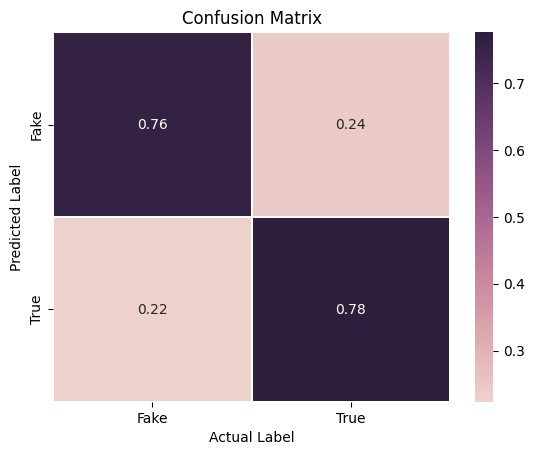

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

conf_norm = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
cmap = sns.cubehelix_palette(as_cmap=True)

sns.heatmap(conf_norm, 
            annot=True, 
            cmap=cmap, 
            linewidths=0.2, 
            xticklabels=["Fake", "True"], 
            yticklabels=["Fake", "True"])


plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

## Workflow to get predictions

In [53]:
import pickle

with open("pipeline.pkl", 'rb') as f:
    pipeline = pickle.load(f)

In [54]:
import spacy
import lftk
import pandas as pd

In [55]:
nlp = spacy.load("en_core_web_sm")

In [56]:
def extract_linguistic_features(text):
    
    doc = nlp(text)
    
    features = ['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var', 'uber_ttr_no_lem', 'a_propn_ps', 'smog']
    LFTK = lftk.Extractor(docs = doc)
    LFTK.customize(stop_words = True, round_decimal = 2)
    doc_features = LFTK.extract(features=features)
    
    X = pd.DataFrame([doc_features])
    
    return X

In [57]:
def predict_text(text, pipeline_path):
    
    # text_utf8 = text.encode("utf-8")
    
    with open(pipeline_path, 'rb') as f:
        pipeline = pickle.load(f)
    
    X_transformed = extract_linguistic_features(text)
    prediction_array = pipeline.predict(X_transformed)
    prediction = prediction_array[0]
    
    result_dict_translation = {0:"Fake", 1:"True"}
    
    return result_dict_translation[prediction]

In [58]:
text_example = "A law enforcement sniper assigned to former President Donald Trump's rally Saturday in Butler, Pennsylvania, says the head of the Secret Service ordered him not to shoot the suspect accused of attempting to assassinate Trump."

In [59]:
predict_text(text_example, "pipeline.pkl")

'Fake'